In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

In [4]:
from scipy.stats import chi2_contingency

In [5]:
encuesta2 = pd.read_csv('rencuesta2.csv', delimiter=';' )
variablesE2 = pd.read_csv('variables2.csv' , delimiter=';' )
equivalente_lengua = pd.read_csv('equivalentes_lengua_variables.csv', delimiter=';')

In [6]:
print(encuesta2.columns)

Index(['ID', 'Hora de inicio', 'Hora de finalización', 'Correo electrónico',
       'Nombre', '¿Cuál es su edad?', '¿De dónde es tu procedencia natal?',
       '¿Cuál es su genero?', '¿Actualmente cuentas con un trabajo?',
       '¿Qué carrera estas estudiando?',
       '¿En que año de la carrera estas cursando?',
       '¿Te consideras autodidacta?', 'Cientifico', 'Tecnológico',
       'Matemáticos', 'Literarios',
       '¿Consideras que el tiempo que dispones para estudiar es muy poco?',
       '¿Tienes buen acceso a Internet?',
       '¿Cuál es la gama de tu computadora?',
       '¿Qué nivel de habilidades de programación consideras tener para desarrollar aplicaciones simples?',
       '¿Con cuáles de los siguientes lenguajes de programación has desarrollado software?',
       'Física cuántica', 'Arquitectura de computadoras', 'Programación',
       'Diseño de compiladores', 'Matemáticas',
       '¿Qué tan informado te sientes sobre los últimos avances científicos y tecnológicos?',


"Eliminando columnas innecesarias**

In [7]:
encuesta2 = encuesta2.drop(['ID', 'Hora de inicio','Hora de finalización','Correo electrónico','Nombre'], axis=1)

In [8]:
encuesta2.columns

Index(['¿Cuál es su edad?', '¿De dónde es tu procedencia natal?',
       '¿Cuál es su genero?', '¿Actualmente cuentas con un trabajo?',
       '¿Qué carrera estas estudiando?',
       '¿En que año de la carrera estas cursando?',
       '¿Te consideras autodidacta?', 'Cientifico', 'Tecnológico',
       'Matemáticos', 'Literarios',
       '¿Consideras que el tiempo que dispones para estudiar es muy poco?',
       '¿Tienes buen acceso a Internet?',
       '¿Cuál es la gama de tu computadora?',
       '¿Qué nivel de habilidades de programación consideras tener para desarrollar aplicaciones simples?',
       '¿Con cuáles de los siguientes lenguajes de programación has desarrollado software?',
       'Física cuántica', 'Arquitectura de computadoras', 'Programación',
       'Diseño de compiladores', 'Matemáticas',
       '¿Qué tan informado te sientes sobre los últimos avances científicos y tecnológicos?',
       '¿Crees que la información científica está disponible y accesible para la poblac

In [9]:
len(encuesta2.columns)

53

In [10]:
variablesE2

,preguntas,variables
0,Edad,edad
1,Zona Rural o Urbana /Vive fuera o dentro de la...,zona
2,"Genero [Femenino,Masculino, Prefiero no especi...",sex
3,Trabajas Si/No,trabaja
4,Que carrera estudias?,carrera
5,"En que año de la carrera estás? [1er,2do,3er,4...",annio_carrera
6,Te consideras autodidacta Si/No,autodidacta
7,Cientificos,temas_interes_cie
8,Tecnologicos,temas_interes_tec
9,Matematicos,temas_interes_mate


In [11]:
encuesta2.columns  = variablesE2.loc[ : , 'variables' ]

In [12]:
encuesta2

variables,edad,zona,sex,trabaja,carrera,annio_carrera,autodidacta,temas_interes_cie,temas_interes_tec,temas_interes_mate,...,clases_conexion,interes_tema_disruptivo,participar_investigacion_disruptiva,temas_disruptivo_bd,temas_disruptivo_ia,temas_disruptivo_cib,temas_disruptivo_bc,temas_disruptivo,temas_disruptivo_nano,info_nec
0,22-27,Zona Rural,Masculino,No,Ingeniería en Sistemas,Quinto año o más,Si,5,5,4,...,Arquitectura de computadoras;Inteligencia Arti...,10.0,Si,2,4,5,5,4,3,No se
1,22-27,Zona Urbana,Masculino,No,Ingeniería en Sistemas,Quinto año o más,Si,5,5,3,...,Arquitectura de computadoras;Diseño Digital;In...,7.0,Si,4,4,4,4,4,4,No
2,17-21,Zona Urbana,Masculino,Si,Ingeniería en Sistemas,Tercer año,Si,5,5,5,...,NaN,9.0,Si,5,5,5,1,3,5,Si
3,17-21,Zona Urbana,Masculino,No,Licenciatura en Física,Segundo año,Si,4,3,4,...,NaN,6.0,Si,3,3,4,3,4,3,No
4,22-27,Zona Rural,Masculino,No,Ingeniería en Sistemas,Quinto año o más,Si,3,5,3,...,NaN,5.0,No,3,3,3,2,2,2,No se
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,28-32,Zona Rural,Femenino,Si,Ingeniería en Sistemas,Quinto año o más,Si,1,3,2,...,NaN,8.0,Si,3,3,3,3,3,3,Si
117,22-27,Zona Urbana,Femenino,No,Ingeniería en Sistemas,Quinto año o más,Si,3,4,3,...,Inteligencia Artificial;,5.0,Si,4,4,4,4,4,4,No se
118,22-27,Zona Rural,Masculino,No,Ingeniería en Sistemas,Cuarto año,Si,5,5,4,...,NaN,5.0,No,4,4,5,4,4,4,Si
119,22-27,Zona Urbana,Femenino,No,Ingeniería en Sistemas,Cuarto año,Si,3,2,2,...,NaN,10.0,Si,5,4,5,3,3,3,Si


**Verificando si hay columnas duplicadas**

In [13]:
if len(encuesta2.columns) == len(encuesta2.columns.unique()):
    print("No hay columnas duplicadas en el dataset.")
else:
    dup_columns = encuesta2.columns[encuesta2.columns.duplicated()]
    print(f"Hay columnas duplicadas en el dataset: {dup_columns}")

No hay columnas duplicadas en el dataset.


**Analisis de datos nulos**

In [14]:
datosNulos = pd.DataFrame()
for c_ in encuesta2.columns:
    r_ = pd.DataFrame({
        "columna": [c_]
        , "frequencia": np.sum( pd.isnull( encuesta2.loc[ : , c_ ] ) )
        , "porcentaje":  np.sum( pd.isnull( encuesta2.loc[ : , c_] ) ) / encuesta2.shape[0]
    })
    datosNulos = pd.concat([ datosNulos , r_ ])

In [15]:
datosNulos.loc[datosNulos['porcentaje']>0, : ]

,columna,frequencia,porcentaje
0,lengua_progra,4,0.033058
0,ambito_charla,59,0.487603
0,interes_divulg,8,0.066116
0,presupuesto_divulg,108,0.892562
0,interes_cuantica,31,0.256198
0,info_cuantica,32,0.264463
0,clases_conexion,73,0.603306
0,interes_tema_disruptivo,1,0.008264


In [16]:
columnas_evaluar =  datosNulos.loc[ ( datosNulos['frequencia'] > 0 ) & ( datosNulos['frequencia'] < 10  ) , "columna" ]
encuesta2_w_nulls = pd.DataFrame()
for c_ in columnas_evaluar:    
    row = encuesta2.loc[ pd.isnull( encuesta2[c_] ) , : ]
    encuesta2_w_nulls = pd.concat( [ encuesta2_w_nulls , row ] )

encuesta2_w_nulls = encuesta2_w_nulls.drop_duplicates()
encuesta2_w_nulls["has_null"] = True

**PARA EVALUAR LA CANTIDAD TOTAL DE REGISTROS DE VALORES NULOS**

In [17]:
encuesta2_w_nulls.shape[0] / encuesta2.shape[0]

0.10743801652892562

In [18]:
encuesta2_w_nulls

variables,edad,zona,sex,trabaja,carrera,annio_carrera,autodidacta,temas_interes_cie,temas_interes_tec,temas_interes_mate,...,interes_tema_disruptivo,participar_investigacion_disruptiva,temas_disruptivo_bd,temas_disruptivo_ia,temas_disruptivo_cib,temas_disruptivo_bc,temas_disruptivo,temas_disruptivo_nano,info_nec,has_null
72,17-21,Zona Rural,Masculino,No,Ingeniería en Sistemas,Segundo año,No,3,4,4,...,10.0,Si,4,4,4,3,5,5,No,True
76,22-27,Zona Urbana,Femenino,No,Ingeniería Eléctrica,Quinto año o más,No,3,3,5,...,4.0,Si,4,4,5,3,3,3,No se,True
88,22-27,Zona Urbana,Femenino,Si,Ingeniería en Sistemas,Primer año,No,3,4,4,...,1.0,Si,1,3,4,3,4,4,No se,True
98,17-21,Zona Urbana,Masculino,No,Ingeniería Eléctrica,Segundo año,No,5,5,5,...,8.0,Si,4,5,5,4,5,5,Si,True
16,17-21,Zona Urbana,Masculino,Si,Ingeniería en Sistemas,Cuarto año,Si,5,5,4,...,10.0,Si,5,5,5,5,5,5,Si,True
33,22-27,Zona Rural,Masculino,Si,Ingeniería en Sistemas,Quinto año o más,Si,2,3,2,...,6.0,Si,2,4,4,3,3,3,Si,True
49,28-32,Zona Urbana,Masculino,No,Ingeniería en Sistemas,Quinto año o más,Si,4,5,5,...,10.0,Si,5,5,5,5,5,5,Si,True
67,22-27,Zona Urbana,Femenino,No,Ingeniería en Sistemas,Quinto año o más,No,1,4,2,...,5.0,Si,5,4,5,4,4,4,Si,True
78,28-32,Zona Urbana,Masculino,No,Ingeniería en Sistemas,Quinto año o más,Si,2,4,3,...,7.0,Si,4,4,3,3,3,4,Si,True
82,22-27,Zona Urbana,Femenino,No,Ingeniería en Sistemas,Quinto año o más,Si,4,4,2,...,8.0,Si,2,4,3,3,4,4,Si,True


In [19]:
encuesta2_wo_nulls = encuesta2.merge( encuesta2_w_nulls.loc[ : , ["has_null"] ] , left_index=True , right_index=True , how="left" )
encuesta2_wo_nulls.loc[ pd.isnull( encuesta2_wo_nulls["has_null"] ) , : ]

variables,edad,zona,sex,trabaja,carrera,annio_carrera,autodidacta,temas_interes_cie,temas_interes_tec,temas_interes_mate,...,interes_tema_disruptivo,participar_investigacion_disruptiva,temas_disruptivo_bd,temas_disruptivo_ia,temas_disruptivo_cib,temas_disruptivo_bc,temas_disruptivo,temas_disruptivo_nano,info_nec,has_null
0,22-27,Zona Rural,Masculino,No,Ingeniería en Sistemas,Quinto año o más,Si,5,5,4,...,10.0,Si,2,4,5,5,4,3,No se,NaN
1,22-27,Zona Urbana,Masculino,No,Ingeniería en Sistemas,Quinto año o más,Si,5,5,3,...,7.0,Si,4,4,4,4,4,4,No,NaN
2,17-21,Zona Urbana,Masculino,Si,Ingeniería en Sistemas,Tercer año,Si,5,5,5,...,9.0,Si,5,5,5,1,3,5,Si,NaN
3,17-21,Zona Urbana,Masculino,No,Licenciatura en Física,Segundo año,Si,4,3,4,...,6.0,Si,3,3,4,3,4,3,No,NaN
4,22-27,Zona Rural,Masculino,No,Ingeniería en Sistemas,Quinto año o más,Si,3,5,3,...,5.0,No,3,3,3,2,2,2,No se,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,28-32,Zona Rural,Femenino,Si,Ingeniería en Sistemas,Quinto año o más,Si,1,3,2,...,8.0,Si,3,3,3,3,3,3,Si,NaN
117,22-27,Zona Urbana,Femenino,No,Ingeniería en Sistemas,Quinto año o más,Si,3,4,3,...,5.0,Si,4,4,4,4,4,4,No se,NaN
118,22-27,Zona Rural,Masculino,No,Ingeniería en Sistemas,Cuarto año,Si,5,5,4,...,5.0,No,4,4,5,4,4,4,Si,NaN
119,22-27,Zona Urbana,Femenino,No,Ingeniería en Sistemas,Cuarto año,Si,3,2,2,...,10.0,Si,5,4,5,3,3,3,Si,NaN


**Tratamiento de variables Nulas** 

columnas con porcentaje de representatibilidad bajo o menor a 5

In [20]:
c_porcetaje_bajo = datosNulos.loc[ 
    (datosNulos['porcentaje'] >= 0.001) 
    & (datosNulos['porcentaje'] < 0.04 )
    , "columna"  
]

In [21]:
c_porcetaje_bajo

0              lengua_progra
0    interes_tema_disruptivo
Name: columna, dtype: object

In [22]:
encuesta2.loc[:,['lengua_progra', 'interes_tema_disruptivo']]

variables,lengua_progra,interes_tema_disruptivo
0,JavaScript;Python;C++;Rust;,10.0
1,Python;JavaScript;C++;,7.0
2,JavaScript;,9.0
3,C++;,6.0
4,C++;JavaScript;Python;,5.0
...,...,...
116,Python;JavaScript;PHP;C++;,8.0
117,Python;JavaScript;C++;,5.0
118,Python;JavaScript;C++;,5.0
119,JavaScript;PHP;C++;,10.0


In [23]:
encuesta2.loc[:,['interes_divulg', 'interes_cuantica','info_cuantica','ambito_charla','presupuesto_divulg','clases_conexion']]

variables,interes_divulg,interes_cuantica,info_cuantica,ambito_charla,presupuesto_divulg,clases_conexion
0,Si,5.0,Si,Tecnologicas;Literarias;,NaN,Arquitectura de computadoras;Inteligencia Arti...
1,Si,4.0,No,Fisicas;Tecnologicas;,NaN,Arquitectura de computadoras;Diseño Digital;In...
2,No,4.0,Si,Tecnologicas;,Si,NaN
3,Si,3.0,Si,Matemáticas;,NaN,NaN
4,Si,NaN,NaN,Tecnologicas;Matemáticas;,NaN,NaN
...,...,...,...,...,...,...
116,No,NaN,NaN,NaN,No,NaN
117,Si,3.0,NaN,NaN,NaN,Inteligencia Artificial;
118,Si,3.0,Si,NaN,NaN,NaN
119,Si,3.0,Si,Matemáticas;Tecnologicas;Literarias;,NaN,NaN


**CAMBIO DE VARIABLES NaN a VARIBALES NULAS**

Calculando medianas para ser remplazadas en las nulas

In [24]:
encuesta2.loc[ pd.isnull( encuesta2["interes_cuantica"] ) , "interes_cuantica" ] = np.nanmedian( encuesta2["interes_cuantica"] )
encuesta2.loc[ pd.isnull( encuesta2["interes_tema_disruptivo"] ) , "interes_tema_disruptivo" ] = np.nanmedian( encuesta2["interes_tema_disruptivo"] )

In [25]:
nulos = encuesta2['interes_cuantica'].isnull().sum()
if nulos > 0:
    print(f'La columna "interes_cuantica" contiene {nulos} valores nulos')
else:
    print('La columna "interes_cuantica" no contiene valores nulos')

La columna "interes_cuantica" no contiene valores nulos


Reemplazando valores nulos por respuestas "ninguna"

In [26]:
encuesta2[["info_cuantica", "interes_divulg", "ambito_charla", "presupuesto_divulg", "clases_conexion", "lengua_progra"]] = encuesta2[["info_cuantica", "interes_divulg", "ambito_charla", "presupuesto_divulg", "clases_conexion","lengua_progra"]].fillna(value="Ninguno")

**Validando que el dataframe no tenga valores nulos**

In [27]:
if encuesta2.isnull().values.any():
    print('El DataFrame tiene valores nulos')
else:
    print('El DataFrame no tiene valores nulos')

El DataFrame no tiene valores nulos


In [28]:
encuesta2['interes_tema_disruptivo'].median()

7.0

**Popularidad de variables Categoricas**

In [29]:
def get_popularidad_seleccion_multiple(df, col, sep=r'[,;]'):
    summary = pd.DataFrame()
    for index, row in df.iterrows():    
        s = pd.DataFrame({
            col: re.split(sep, row[col])
        })
        s[col] = s.apply(lambda r: r[col].strip(), axis=1)
        s['n'] = 1
        summary = pd.concat([summary, s])    
    summary = summary.groupby([col], as_index=False).agg({'n': ['sum']})
    summary.columns = summary.columns.droplevel(1)
    return summary.sort_values('n', ascending=False)

**Obteniendo la popularidad de las opciones**

In [30]:
edad_pop = get_popularidad_seleccion_multiple( encuesta2 , "edad" )
carrera_pop = get_popularidad_seleccion_multiple( encuesta2 , "carrera" )
annio_carrera_pop = get_popularidad_seleccion_multiple( encuesta2 , "annio_carrera" )
habilidad_progra_pop = get_popularidad_seleccion_multiple( encuesta2 , "habilidad_progra" )
lengua_progra_pop = get_popularidad_seleccion_multiple( encuesta2 , "lengua_progra" )
nivel_divulg_pop = get_popularidad_seleccion_multiple( encuesta2 , "nivel_divulg" )
clases_conexion_pop = get_popularidad_seleccion_multiple( encuesta2 , "clases_conexion" )

In [31]:
#pd.set_option('display.max_rows', None) #linea para visualizar tabla completa

In [32]:
lengua_progra_pop

,lengua_progra,n
0,,117
4,C++,85
9,JavaScript,82
14,Python,74
13,PHP,35
8,Java,27
6,GO,6
11,Ninguno,4
3,C#,4
19,Typescript,2


**Limpieza Lengua_progra**

In [33]:
lengua_progra_pop = lengua_progra_pop[lengua_progra_pop['lengua_progra'] != '']

In [34]:
lengua_progra_pop

,lengua_progra,n
4,C++,85
9,JavaScript,82
14,Python,74
13,PHP,35
8,Java,27
6,GO,6
11,Ninguno,4
3,C#,4
19,Typescript,2
24,java,2


In [35]:
lengua_progra_pop = lengua_progra_pop.drop(22) #Elimina la fila vacia

In [36]:
lengua_progra_pop

,lengua_progra,n
4,C++,85
9,JavaScript,82
14,Python,74
13,PHP,35
8,Java,27
6,GO,6
11,Ninguno,4
3,C#,4
19,Typescript,2
24,java,2


In [37]:
#pd.DataFrame(lengua_progra_pop).to_csv("equivalentes_lengua_variables.csv", sep=";", index=False)

**combinación (innerjoin) entre equivalente_lengua y lengua_progra_pop**

In [38]:
lengua_progra_pop = lengua_progra_pop.merge( equivalente_lengua , right_on="lengua_progra" , left_on="lengua_progra" , how='inner' )

In [39]:
lengua_progra_pop = lengua_progra_pop.loc[ : , ['equivalentes','n_x'] ]

In [40]:
lengua_progra_pop = lengua_progra_pop.groupby( ["equivalentes"] , as_index=False  ).sum()

In [41]:
lengua_progra_pop = lengua_progra_pop.sort_values( ['n_x'] , ascending=False )

**Agregando la columna porcentaje**

In [42]:
lengua_progra_pop['porcentaje'] =  lengua_progra_pop.apply( lambda r: r['n_x'] / np.sum(lengua_progra_pop['n_x']) , axis = 1 ) 

In [43]:
edad_pop['porcentaje'] =  edad_pop.apply( lambda r: r['n'] / np.sum(edad_pop['n']) , axis = 1 ) 
carrera_pop['porcentaje'] =  carrera_pop.apply( lambda r: r['n'] / np.sum(carrera_pop['n']) , axis = 1 )
annio_carrera_pop['porcentaje'] =  annio_carrera_pop.apply( lambda r: r['n'] / np.sum(annio_carrera_pop['n']) , axis = 1 )
habilidad_progra_pop['porcentaje'] =  habilidad_progra_pop.apply( lambda r: r['n'] / np.sum(habilidad_progra_pop['n']) , axis = 1 )
nivel_divulg_pop['porcentaje'] =  nivel_divulg_pop.apply( lambda r: r['n'] / np.sum(nivel_divulg_pop['n']) , axis = 1 )

In [44]:
edad_pop

,edad,n,porcentaje
1,22-27,79,0.652893
0,17-21,24,0.198347
2,28-32,14,0.115702
3,Más de 32,4,0.033058


**Visualizacion de popularidad en grafico de barras**

**_POPULARIDAD EDAD_**

<BarContainer object of 4 artists>

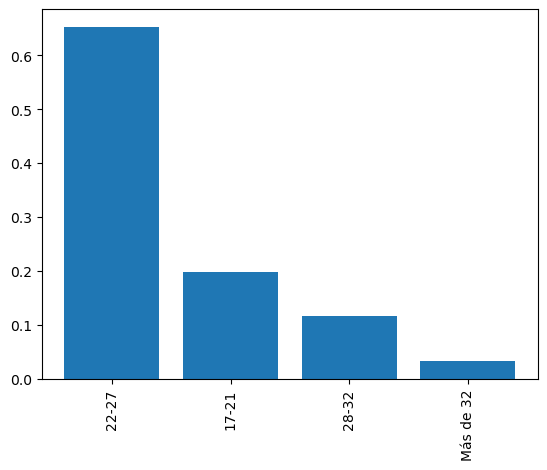

In [45]:
plt.xticks( rotation = 90 )
plt.bar( edad_pop['edad'] , edad_pop['porcentaje'] )

**_POPULARIDAD LENGUAJES DE PROGRAMACION_**

<BarContainer object of 8 artists>

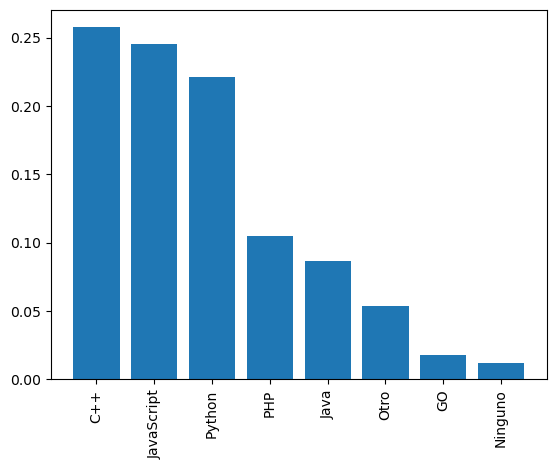

In [46]:
plt.xticks( rotation = 90 )
plt.bar( lengua_progra_pop['equivalentes'] , lengua_progra_pop['porcentaje'] )

**_POPULARIDAD DE CARRERA_**

<BarContainer object of 4 artists>

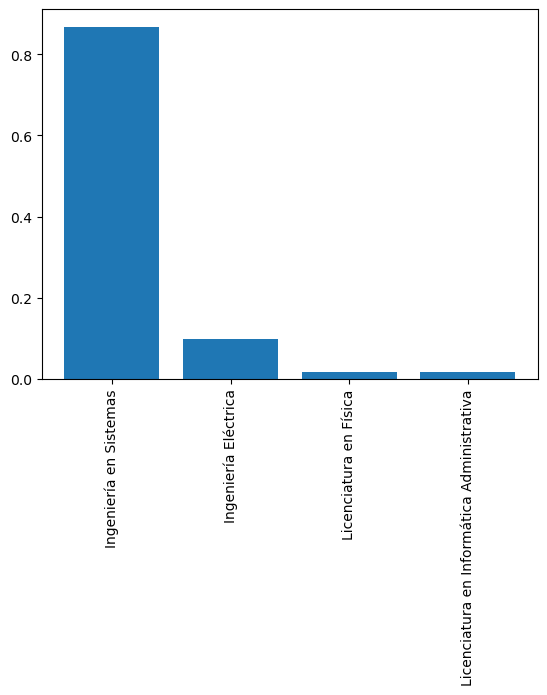

In [47]:
plt.xticks( rotation = 90 )
plt.bar( carrera_pop['carrera'] , carrera_pop['porcentaje'] )

**_POPULARIDAD DE ANIO CARRERA_**

<BarContainer object of 5 artists>

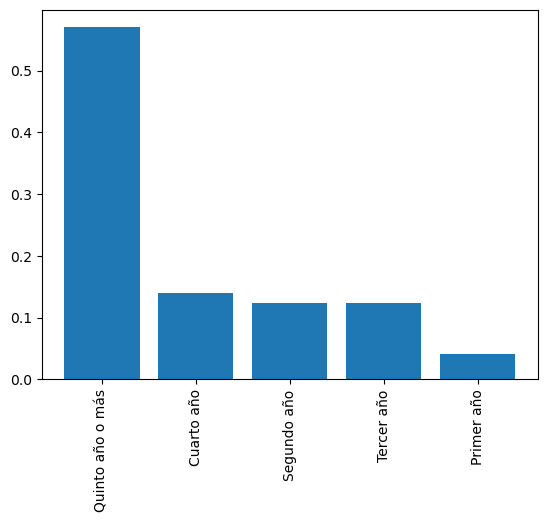

In [48]:
plt.xticks( rotation = 90 )
plt.bar( annio_carrera_pop['annio_carrera'] , annio_carrera_pop['porcentaje'] )

**_POPULARIDAD DE HABILIDAD DE PROGRAMACION_**

<BarContainer object of 4 artists>

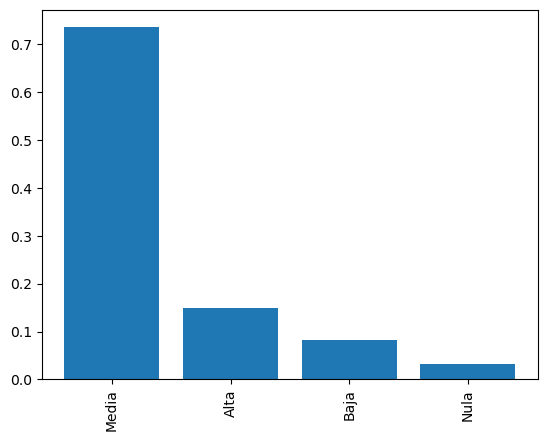

In [49]:
plt.xticks( rotation = 90 )
plt.bar( habilidad_progra_pop['habilidad_progra'] , habilidad_progra_pop['porcentaje'] )

**_Popularidad de la opinion de los estudiantes sobre el nivel de divulgación científica en la sociedad actual_**

<BarContainer object of 4 artists>

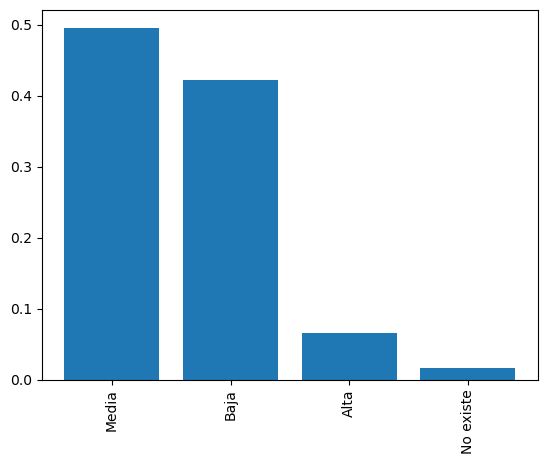

In [50]:
plt.xticks( rotation = 90 )
plt.bar( nivel_divulg_pop['nivel_divulg'] , nivel_divulg_pop['porcentaje'] )

**Analisis de dependencias**

**Hipotesis**

La cantidad de interés que hay en participar en una investigación relacionada con un tema disruptivo en el campo de estudio podría estar relacionada con la importancia que se le da a la investigación en la carrera académica.

Ho (nula) = Mide la independencia de dos variables, la de interes_tema_disruptivo y la de participar_investigacion_disruptiva no depende una de la otra.
H1 (alternativa) = las variables de interes_tema_disruptivo y participar_investigacion_disruptiva son dependientes

( Si el p-value es mayor a 0.05: la opcion a seleccionar es la hipotesis nula )

In [51]:
#interes_tema_disruptivo
#participar_investigacion_disruptiva

In [52]:
encuesta2["interes_tema_disruptivo"].value_counts()  / encuesta2.shape[0]

7.0     0.247934
10.0    0.173554
8.0     0.157025
9.0     0.115702
5.0     0.115702
6.0     0.074380
4.0     0.074380
3.0     0.033058
1.0     0.008264
Name: interes_tema_disruptivo, dtype: float64

In [53]:
encuesta2["participar_investigacion_disruptiva"].value_counts()  / encuesta2.shape[0]

Si    0.950413
No    0.049587
Name: participar_investigacion_disruptiva, dtype: float64

In [54]:
contigency = pd.crosstab( encuesta2["participar_investigacion_disruptiva"] , encuesta2["interes_tema_disruptivo"] )

In [55]:
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='interes_tema_disruptivo', ylabel='participar_investigacion_disruptiva'>

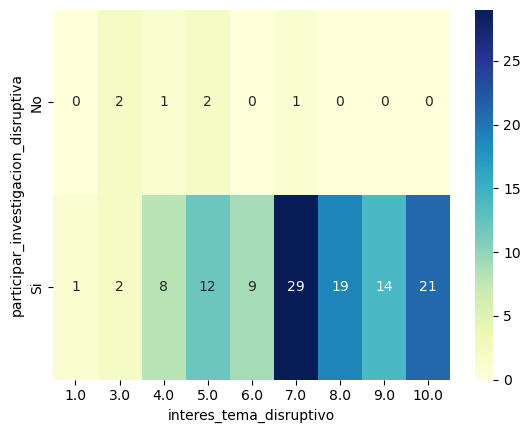

In [56]:
sns.heatmap( contigency , annot = True , cmap="YlGnBu" )

In [57]:
c, p, dof, expected  = chi2_contingency(contigency)

In [58]:
p

0.0022625408698785485

**Analisis**

La participación de los estudiantes en la investigación de temas disruptivos está altamente influenciada por el nivel de interés que tengan en el campo de estudio en el que se desenvuelven.

**Hipotesis**

La cantidad de interés que hay en la computación cuántica podría estar relacionada con la información que hay disponible sobre la tecnología.

Ho (nula) = Mide la independencia de dos variables, la de comp_cuantica y la de info_nec no depende una de la otra.
H1 (alternativa) = las variables de comp_cuantica y info_nec de planificacion son dependientes

( Si el p-value es mayor a 0.05: la opcion a seleccionar es la hipotesis nula )

In [59]:
#comp_cuantica
#info_nec

In [60]:
encuesta2["comp_cuantica"].value_counts()  / encuesta2.shape[0]

Si    0.743802
No    0.256198
Name: comp_cuantica, dtype: float64

In [61]:
encuesta2["info_nec"].value_counts()  / encuesta2.shape[0]

Si       0.545455
No se    0.231405
No       0.223140
Name: info_nec, dtype: float64

In [62]:
contigency2 = pd.crosstab( encuesta2["comp_cuantica"] , encuesta2["info_nec"] )

In [63]:
contigency2

info_nec,No,No se,Si
comp_cuantica,,,
No,3,9,19
Si,24,19,47


<Axes: xlabel='info_nec', ylabel='comp_cuantica'>

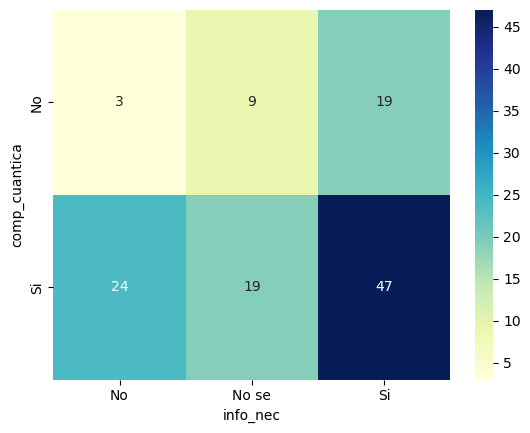

In [64]:
sns.heatmap( contigency2 , annot = True , cmap="YlGnBu" )

In [65]:
c, p, dof, expected  = chi2_contingency(contigency2)

In [66]:
p

0.13838909412571213

**Analisis**

La información sobre tecnologías cuánticas no depende del interés de los estudiantes, porque algunos saben que hay información pero no les interesa el tema, en cambio hay otros que les interesa pero no saben y consideran que no hay información.

**Hipotesis**

El interés sobre la computación cuantica depende del año que el estudiante esta cursando.

Ho (nula) = Mide la independencia de dos variables, la de interes_cuantica y la de annio_carrera no depende una de la otra.
H1 (alternativa) = las variables de interes_cuantica y annio_carrera de planificacion son dependientes

( Si el p-value es mayor a 0.05: la opcion a seleccionar es la hipotesis nula )

In [67]:
#interes_cuantica
#annio_carrera

In [68]:
contigency3 = pd.crosstab( encuesta2["interes_cuantica"] , encuesta2["annio_carrera"] )

In [69]:
contigency3

annio_carrera,Cuarto año,Primer año,Quinto año o más,Segundo año,Tercer año
interes_cuantica,,,,,
1.0,0,0,1,1,0
2.0,1,1,8,0,0
3.0,8,0,12,1,5
4.0,8,4,35,8,10
5.0,0,0,13,5,0


<Axes: xlabel='annio_carrera', ylabel='interes_cuantica'>

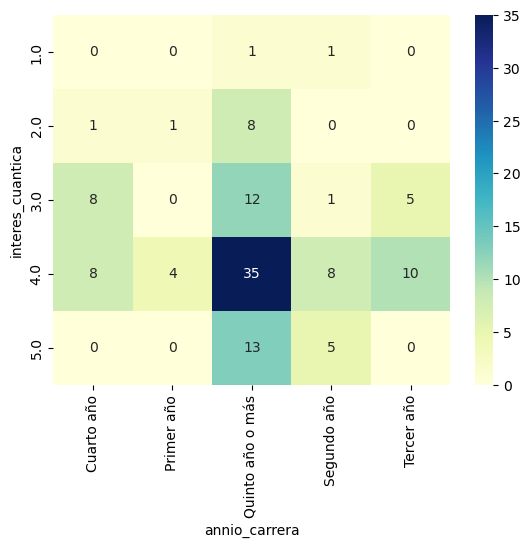

In [70]:
sns.heatmap( contigency3 , annot = True , cmap="YlGnBu" )

In [71]:
c, p, dof, expected  = chi2_contingency(contigency3)

In [72]:
p

0.03527966482291535

**Analisis**

La motivación e interés de los estudiantes en la computación cuántica puede verse influenciada por diversos factores, como su nivel de conocimiento previo, su experiencia en el campo y su contexto académico. Uno de estos factores es el año que están cursando en su formación académica.

**PCA**

Conversion a numericos

In [73]:
print(encuesta2.dtypes)

variables
edad                                    object
zona                                    object
sex                                     object
trabaja                                 object
carrera                                 object
annio_carrera                           object
autodidacta                             object
temas_interes_cie                        int64
temas_interes_tec                        int64
temas_interes_mate                       int64
temas_interes_lit                        int64
tiempo_estudio                          object
internet                                object
gama_pc                                 object
habilidad_progra                        object
lengua_progra                           object
conocimento_cat_fc                      object
conocimiento_cat_arq                    object
conocimiento_cat_pro                    object
conocimiento_cat_dis                    object
conocimiento_cat_mat                    object
ava

In [74]:
numeric_columns

NameError: name 'numeric_columns' is not defined